In [1]:

import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [2]:
### Data TEst
problem_size = 15
alpha = 0.03

total_mortgages = [[0.15, 0.1, 100000],
                    [0.25, 0.05, 200000],
                    [0.2, 0.07, 300000],
                    [0.02, 0.01, 400000],
                    [0.05, 0.05, 300000],
                    [0.2, 0.03, 390000],
                    [0.01, 0.01, 100000],
                    [0.03, 0.09, 120000],
                    [0.2, 0.07, 300000],
                    [0.02, 0.01, 400000],
                    [0.05, 0.05, 300000],
                    [0.25, 0.05, 310000],
                    [0.01, 0.01, 600000],
                    [0.05, 0.01, 800000],
                    [0.04, 0.01, 300000],
                    [0.2, 0.4, 560000],
                    [0.7, 0.10, 100000],
                    [0.04, 0.01, 100000],
                    [0.2, 0.07, 300000],
                    [0.02, 0.01, 400000],
                    [0.05, 0.05, 300000],
                    [0.02, 0.03, 390000],
                    [0.1, 0.01, 200000],
                    [0.04, 0.01, 600000],
                    [0.03, 0.01, 700000]]

mortgages = total_mortgages[:problem_size]

In [3]:
total_value = 0
expected_loss = 0
for i in range(len(mortgages)):
    total_value += mortgages[i][2]
    expected_loss += mortgages[i][0] * mortgages[i][2]

print(total_value)
print(expected_loss)


4920000
449100.0


In [4]:
def montecarlo_sample(mortgages):
    total_loss_given_default = 0
    for i in range(len(mortgages)):
        total_loss_given_default = total_loss_given_default + random.choices([0, mortgages[i][2]], [1-mortgages[i][0], mortgages[i][0]])[0]
    return total_loss_given_default

In [5]:
runs = 100000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = montecarlo_sample(mortgages)

print(simulations)

[600000. 390000. 500000. ...      0. 300000. 300000.]


In [6]:
var_level = 100 - alpha*100

ordered_simulations = np.sort(simulations)

var = np.percentile(ordered_simulations, var_level)
print(var)

cvar = simulations[ordered_simulations > var].mean()
print(cvar+var)

1290000.0
1737996.5928449745


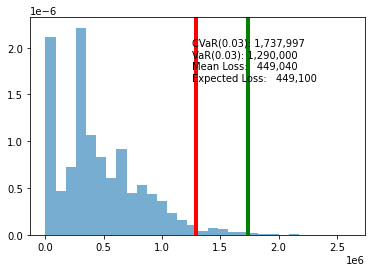

In [7]:

plt.hist(simulations, density=True, bins=30, histtype="stepfilled", alpha=0.6)
plt.figtext(0.5, 0.66, "Expected Loss: {0:9,.0f}".format(expected_loss))
plt.figtext(0.5, 0.7, "Mean Loss: {0:9,.0f}".format(simulations.mean()))
plt.figtext(0.5, 0.74, "VaR({:.2f})".format(alpha)+": {0:9,.0f}".format(var))
plt.figtext(0.5, 0.78, "CVaR({:.2f})".format(alpha)+": {0:9,.0f}".format(cvar+var))
plt.axvline(x=var, linewidth=4, color="r")
plt.axvline(x=cvar+var, linewidth=4, color="g")